In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
def get_XY(file_path):
    with open(file_path, 'r') as data_file:
        csv_reader = csv.reader(data_file)
        x = []
        y = []
        for i,row in enumerate(csv_reader):
            if i > 0:
                x.append([float(row[0]), float(row[1])])
                y.append(int(row[2]))
        data_X = np.array(x)
        data_Y = np.array(y)
    return data_X, data_Y

In [5]:
data_X, data_Y = get_XY('./data.csv')

In [6]:
data_X.shape, data_Y.shape

((10000, 2), (10000,))

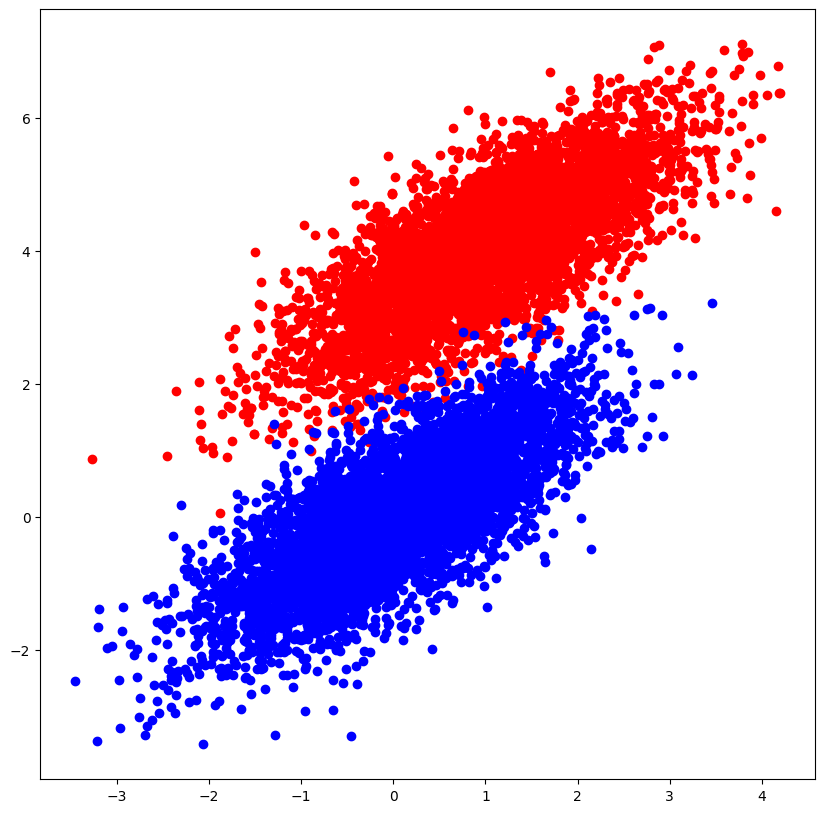

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(data_X[np.where(data_Y == 1),0], data_X[np.where(data_Y == 1),1], color="red")
plt.scatter(data_X[np.where(data_Y == 0),0], data_X[np.where(data_Y == 0),1], color="blue")
plt.show()

In [8]:
#random shuffle and train test split of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.1, random_state=50)

In [9]:
def linear_op(weights, features):
    """
    features: n x m where n is the size of the data and m is the dimensions of each data point
    weights: m + 1 where m is the dimensions and +1 for the bias term
    return: z shape(n)
    """
    z = np.dot(features, weights[:-1]) + weights[-1]
    return z

In [10]:
def sigmoid(weights, features):
    z = linear_op(weights, features)
    return 1 / (1 + np.exp(-z))

In [11]:
def log_likelihood(weights, features, actual_ys):
    z = linear_op(weights, features)
    return np.dot(actual_ys, z) - np.sum(np.log(1 + np.exp(z)))

In [12]:
def gradients(actual_ys, predicted_ys, features):
    delta = actual_ys - predicted_ys
    db = np.sum(delta)
    return np.dot(np.expand_dims(delta, 0), features).transpose().flatten(), db

In [13]:
def learn_weights(actual_ys, features, num_iterations, learning_rate):
    n, m = features.shape
    weights = np.zeros(m+1)
    lls = []
    for i in range(num_iterations):
        if (i+1) % 1000 == 0:
            ll = log_likelihood(weights, features, actual_ys) / features.shape[0]
            lls.append(ll)
            print("log likelihood = ", ll)
        predicted_ys = sigmoid(weights, features)
        dw, db = gradients(actual_ys, predicted_ys, features)
        weights[:-1] += learning_rate * dw
        weights[-1] += learning_rate * db
    plt.figure(figsize=(4, 4))
    plt.plot(range(len(lls)), lls)
    plt.xlabel("Every 1000 iteration")
    plt.ylabel("log likelihood")
    plt.show()
    return weights

log likelihood =  -0.025175583342671518
log likelihood =  -0.020179607967187218
log likelihood =  -0.018253915918313497
log likelihood =  -0.017213937260815226
log likelihood =  -0.016560506879306762
log likelihood =  -0.016112528902561787
log likelihood =  -0.015787397885428316
log likelihood =  -0.015541745697157846
log likelihood =  -0.015350508586835026
log likelihood =  -0.015198150034503165


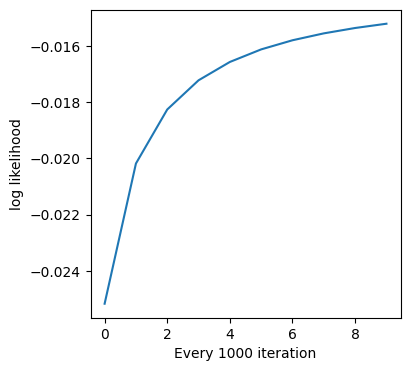

In [14]:
weights = learn_weights(y_train, X_train, 10000, 0.00005)

In [15]:
# Generate grid points to plot decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

In [16]:
line_features = np.c_[xx.ravel(), yy.ravel()]
line_features.shape

(10000, 2)

In [17]:
z1 = linear_op(weights, line_features)
z1 = z1.reshape(xx.shape)

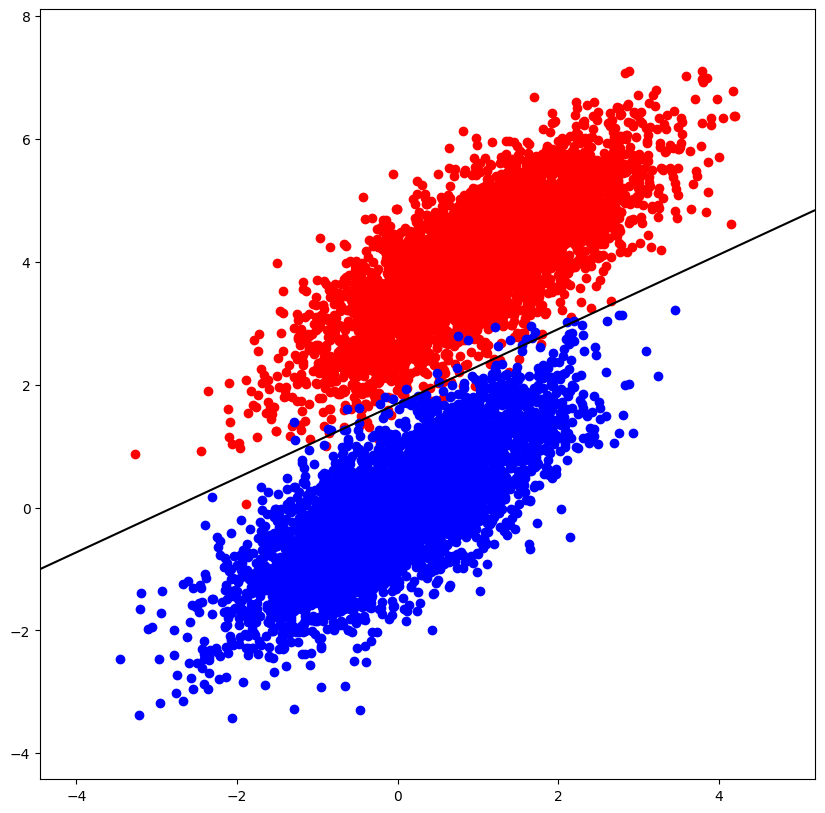

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(X_train[np.where(y_train == 1),0], X_train[np.where(y_train == 1),1], color="red")
plt.scatter(X_train[np.where(y_train == 0),0], X_train[np.where(y_train == 0),1], color="blue")
plt.contour(xx, yy, z1, levels=[0], colors='k')
plt.show()

In [19]:
def lr_classifier(X, weights, T):
    predictions_ys = sigmoid(weights, X)
    class_1_predictions = np.where(predictions_ys > T)
    predictions = np.zeros(predictions_ys.shape)
    predictions[class_1_predictions] = 1
    return predictions_ys, predictions

In [20]:
proba, pred = lr_classifier(X_test, weights, 0.5)

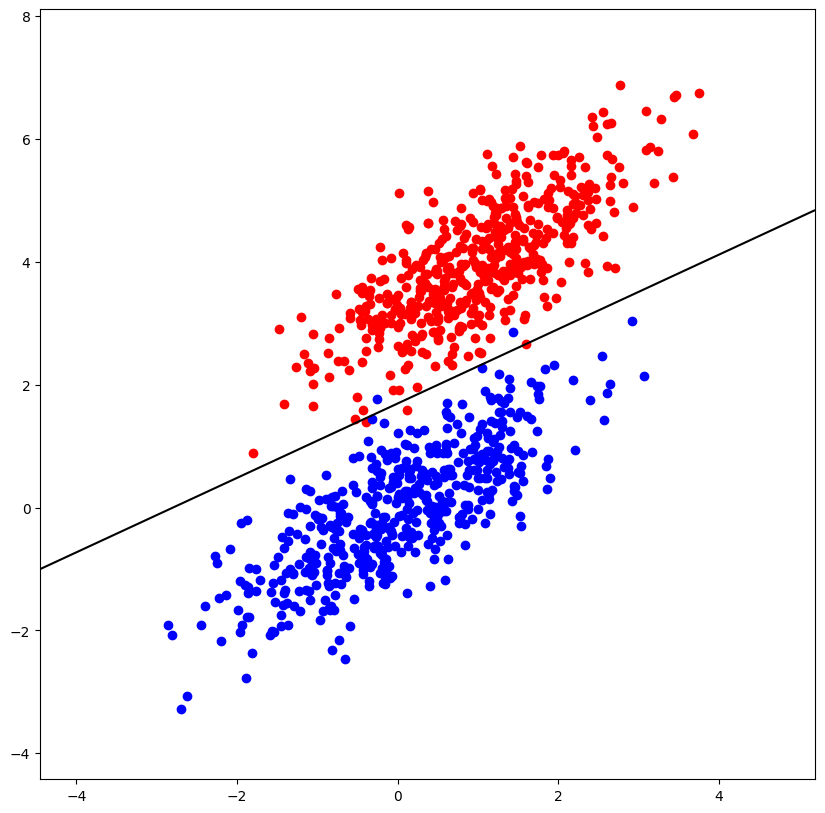

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[np.where(y_test == 1),0], X_test[np.where(y_test == 1),1], color="red")
plt.scatter(X_test[np.where(y_test == 0),0], X_test[np.where(y_test == 0),1], color="blue")
plt.contour(xx, yy, z1, levels=[0], colors='k')
plt.show()

In [22]:
pred.shape, np.sum(pred)

((1000,), 499.0)

In [23]:
X_test.shape, y_test[np.where(y_test == 1)].shape

((1000, 2), (499,))

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy = accuracy_score(y_test, pred) * 100
print(f"Accuracy = {accuracy} %")

Accuracy = 99.6 %


In [26]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, proba)

In [28]:
auc(fpr, tpr)

0.9998959995839983

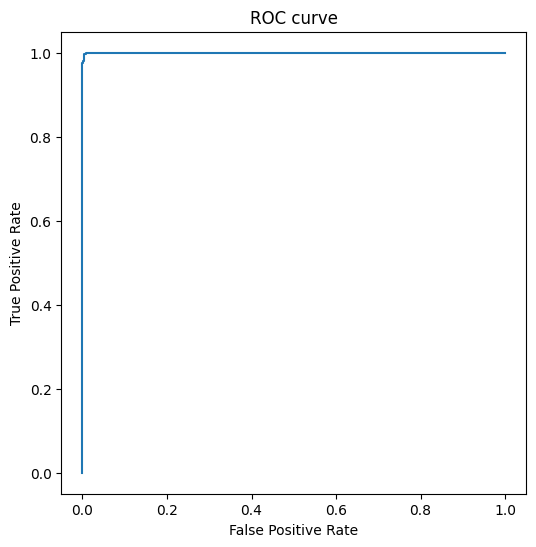

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Positive {tp}\nTrue Negative {tn}\nFalse Positive {fp}\nFalse Negative {fn}")

True Positive 497
True Negative 499
False Positive 2
False Negative 2
